In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
folder_path = r"\\10.99.68.53\Digital pathology image lib\_Image libraries for training\2023-05-09 Published HE Nuclei Datasets\Segmentation Scores on Interpolations"

In [3]:
models = ['SD_HE_20x', '2D_versatile_he', 'HN_CoNSeP', 'HN_CPM17', 'HN_Kumar']
# models = ['2D_versatile_he', 'SD_HE_20x', 'HN_CoNSeP', 'HN_CPM17', 'HN_Kumar']
dfs = [pd.read_csv(os.path.join(folder_path, model + '.csv')) for model in models]
df_splits = pd.read_csv(os.path.join(folder_path, 'SPLITS.csv'))
ordering = ['L - 40x - __',
            'L - 20x - 0_', 'L - 20x - 1_', 'L - 20x - 3_',
            'L - 40x - 00', 'L - 40x - 01', 'L - 40x - 03',
            'L - 40x - 10', 'L - 40x - 11', 'L - 40x - 13',
            'L - 40x - 30', 'L - 40x - 31', 'L - 40x - 33',
            'R - 20x - 33', 'R - 20x - 31', 'R - 20x - 30',
            'R - 20x - 13', 'R - 20x - 11', 'R - 20x - 10',
            'R - 20x - 03', 'R - 20x - 01', 'R - 20x - 00',
            'R - 40x - 3_', 'R - 40x - 1_', 'R - 40x - 0_',
            'R - 20x - __']

In [4]:
for i, df in enumerate(dfs):
    df = df[df['Tau'] == 0.5]
    df.loc[:, 'Interpolation'] = pd.Categorical(df['Interpolation'], categories=ordering, ordered=True)
    df = df.sort_values(by='Interpolation')
    df = pd.merge(left=df, right=df_splits, how='left', on=['Dataset', 'Tile'])
    df['SubTEST'].fillna(False, inplace=True)
    df = df[(df['SubTEST'] ==  True) | (df['Dataset'] == 'JHU')]
    df.drop_duplicates(inplace=True)
    dfs[i] = df
df

,Model,Interpolation,Dataset,Tile,Tau,TP,FP,FN,Precision,Recall,F1-Score,Panoptic Quality,Split,SubTEST
129,HN_Kumar,L - 20x - 0_,CryoNuSeg,Human_AdrenalGland_02,0.5,47,8,53,0.854545,0.470000,0.606452,0.457524,Test,True
133,HN_Kumar,L - 20x - 0_,CryoNuSeg,Human_ThyroidGland_01,0.5,50,3,29,0.943396,0.632911,0.757576,0.580511,Test,True
135,HN_Kumar,L - 20x - 0_,CryoNuSeg,Human_ThyroidGland_03,0.5,56,17,78,0.767123,0.417910,0.541063,0.418357,Test,True
139,HN_Kumar,L - 20x - 0_,MoNuSeg,TCGA-2Z-A9J9-01A-01-TS1,0.5,309,122,135,0.716937,0.695946,0.706286,0.507291,Test,True
141,HN_Kumar,L - 20x - 0_,MoNuSeg,TCGA-44-2665-01B-06-BS6,0.5,439,70,198,0.862475,0.689168,0.766143,0.594170,Test,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,HN_Kumar,R - 40x - 3_,JHU,FallopianTube_test_2,0.5,181,81,279,0.690840,0.393478,0.501385,0.364819,NaN,False
2622,HN_Kumar,R - 40x - 3_,JHU,FallopianTube_test_1,0.5,172,80,283,0.682540,0.378022,0.486563,0.362829,NaN,False
2623,HN_Kumar,R - 40x - 3_,JHU,Skin_train_4,0.5,192,33,140,0.853333,0.578313,0.689408,0.549536,NaN,False
2624,HN_Kumar,R - 40x - 3_,JHU,Pancreas_test_4,0.5,124,21,119,0.855172,0.510288,0.639175,0.498273,NaN,False


In [5]:
for i, df in enumerate(dfs):
    df = df.groupby(by=['Interpolation']).agg(
        {'Precision': ['mean', 'std'], 'Recall': ['mean', 'std'], 'F1-Score': ['mean', 'std'], 'Panoptic Quality': ['mean', 'std']}).reset_index(drop=False)
    dfs[i] = df
df

Interpolation Precision              Recall            F1-Score             
                      mean       std      mean       std      mean       std   
0   L - 20x - 0_  0.828896  0.088383  0.581187  0.128964  0.675504  0.098414  \
1   L - 20x - 1_  0.828811  0.092503  0.586267  0.136977  0.679222  0.108904   
2   L - 20x - 3_  0.822573  0.094467  0.582868  0.139235  0.674526  0.109601   
3   L - 40x - 00  0.887378  0.033835  0.723066  0.151159  0.789471  0.091026   
4   L - 40x - 01  0.893549  0.054355  0.709234  0.149568  0.783231  0.093734   
5   L - 40x - 03  0.868097  0.029846  0.721315  0.148789  0.781294  0.089969   
6   L - 40x - 10  0.898011  0.051322  0.726828  0.150121  0.795723  0.089808   
7   L - 40x - 11  0.895202  0.056409  0.708409  0.160213  0.783148  0.104952   
8   L - 40x - 13  0.891576  0.042447  0.724377  0.151685  0.791269  0.088254   
9   L - 40x - 30  0.885744  0.049738  0.732022  0.152293  0.794490  0.092781   
10  L - 40x - 31  0.895835  0.053045  0.716610  0.158133  0.788200  0.098831   
11  L - 40x - 33  0.885348  0.046619  0.730914  0.147740  0.793444  0.086553   
12  L - 40x - __  0.877396  0.037117  0.741669  0.145101  0.796833  0.083242   
13  R - 20x - 00  0.802627  0.112158  0.381967  0.172704  0.495535  0.184855   
14  R - 20x - 01  0.801457  0.113773  0.381635  0.172895  0.495001  0.184530   
15  R - 20x - 03  0.807230  0.112789  0.385992  0.174537  0.499583  0.186376   
16  R - 20x - 10  0.799759  0.114805  0.378475  0.171692  0.492271  0.183865   
17  R - 20x - 11  0.793806  0.119881  0.376402  0.173987  0.489373  0.186151   
18  R - 20x - 13  0.799170  0.119470  0.379851  0.173571  0.493516  0.185296   
19  R - 20x - 30  0.797306  0.110104  0.382898  0.168250  0.496114  0.178120   
20  R - 20x - 31  0.801201  0.115620  0.381360  0.173081  0.494768  0.185143   
21  R - 20x - 33  0.806062  0.115610  0.384025  0.173474  0.497989  0.185254   
22  R - 20x - __  0.803859  0.113066  0.384227  0.173332  0.497599  0.185405   
23  R - 40x - 0_  0.793201  0.084843  0.530066  0.145096  0.626484  0.128639   
24  R - 40x - 1_  0.789008  0.089850  0.509324  0.146348  0.609633  0.133816   
25  R - 40x - 3_  0.778789  0.088744  0.521096  0.146302  0.614821  0.129903   

   Panoptic Quality            
               mean       std  
0          0.511571  0.076164  
1          0.519428  0.085245  
2          0.518483  0.085242  
3          0.600274  0.073853  
4          0.585598  0.077546  
5          0.593199  0.071444  
6          0.608114  0.083367  
7          0.589953  0.092229  
8          0.603118  0.080353  
9          0.610451  0.084161  
10         0.596808  0.087876  
11         0.606635  0.079118  
12         0.611614  0.070323  
13         0.385521  0.153067  
14         0.385929  0.153981  
15         0.389081  0.154958  
16         0.378314  0.150340  
17         0.381553  0.155363  
18         0.384642  0.154459  
19         0.381788  0.146779  
20         0.385604  0.154310  
21         0.387849  0.154357  
22         0.387958  0.154593  
23         0.484121  0.115559  
24         0.469298  0.118441  
25         0.473559  0.114690

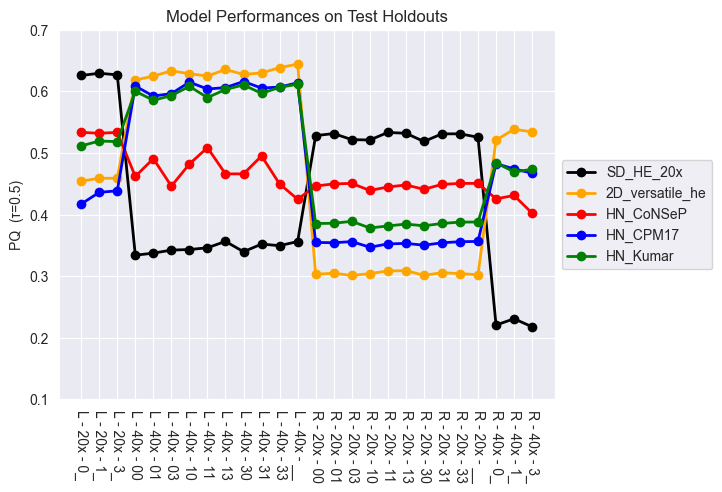

In [6]:
fig, ax = plt.subplots()
colors = ['black', 'orange', 'red', 'blue', 'green']
for i, df in enumerate(dfs):
    ax.plot(df[('Interpolation', '')], df[('Panoptic Quality', 'mean')], marker='o', color=colors[i], linewidth=2, label=models[i])
ax.set_ylabel('PQ  (τ=0.5)')
ax.set_ylim(0.1, 0.7)
ax.set_title('Model Performances on Test Holdouts')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=270)
plt.savefig('chart_lines_all_interpolations.png', bbox_inches='tight')
plt.show()

C:\Users\labuser\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


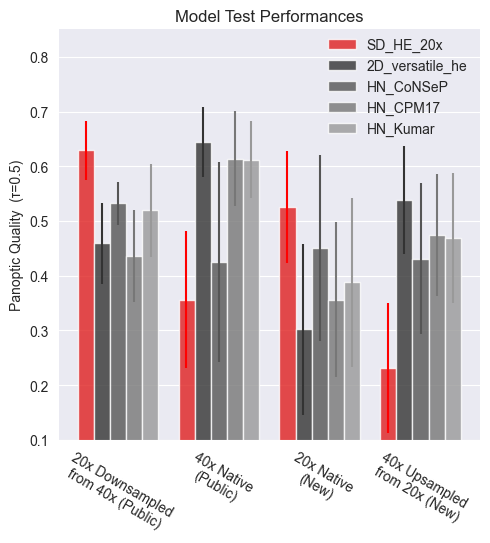

In [13]:
for i, df in enumerate(dfs):
    df.loc[df[('Interpolation', '')] == 'L - 40x - __', ('Interpolation', '')] = '40x Native\n(Public)'
    df.loc[df[('Interpolation', '')] == 'R - 20x - __', ('Interpolation', '')] = '20x Native\n(New)'
    df.loc[df[('Interpolation', '')] == 'L - 20x - 1_', ('Interpolation', '')] = '20x Downsampled\nfrom 40x (Public)'
    df.loc[df[('Interpolation', '')] == 'R - 40x - 1_', ('Interpolation', '')] = '40x Upsampled\nfrom 20x (New)'
    df = df[(df[('Interpolation', '')] == '40x Native\n(Public)') | (df[('Interpolation', '')] == '20x Native\n(New)') | \
            (df[('Interpolation', '')] == '20x Downsampled\nfrom 40x (Public)') | (df[('Interpolation', '')] == '40x Upsampled\nfrom 20x (New)')]
    dfs[i] = df

data = []
for i, df in enumerate(dfs):
    for interp, pq_mean, pq_std in zip(df[('Interpolation', '')], df[('Panoptic Quality', 'mean')], df[('Panoptic Quality', 'std')]):
        data.append(pd.DataFrame({'Interpolation': [interp], 'Panoptic Quality (mean)': [pq_mean], 'Panoptic Quality (std)': [pq_std], 'Model': [models[i]]}))
df_concat = pd.concat(data)

custom_palette = sns.color_palette(['red', '#333333', '#555555', '#777777', '#999999'])
g = sns.catplot(data=df_concat, x='Interpolation', y='Panoptic Quality (mean)', hue='Model', kind='bar', palette=custom_palette, alpha=0.8, legend=False)
g.despine(left=True)
plt.legend(title=None, loc='upper right', framealpha=0.0, bbox_to_anchor=(1, 1.01))

bar_width = 0.3229
x_shift = np.linspace(-bar_width, bar_width, len(df_concat['Model'].unique()))
for i, model in enumerate(df_concat['Model'].unique()):
    model_data = df_concat[df_concat['Model'] == model]
    x = np.arange(len(model_data['Interpolation'])) + x_shift[i]
    y = model_data['Panoptic Quality (mean)']
    yerr = model_data['Panoptic Quality (std)']
    plt.errorbar(x, y, yerr=yerr, fmt='none', capsize=0, label=model, color=custom_palette[i])

plt.title('Model Test Performances')
plt.ylabel('Panoptic Quality  (τ=0.5)')
plt.xlabel(None)
plt.ylim(0.1, 0.85)
plt.xticks(ticks=np.arange(len(df_concat['Interpolation'].unique())), labels=df_concat['Interpolation'].unique(), rotation=-30)
plt.savefig('chart.png', bbox_inches='tight')
plt.show()